In [1]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     -------------------------------------- 152.1/152.1 kB 4.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install --upgrade pillow

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 2.5/2.5 MB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from tweetscraper import tweets

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to c:\users\lip22mpa\appdata\local\temp\pip-req-build-typ0q1y_


  Running command git clone -q https://github.com/JustAnotherArchivist/snscrape.git 'C:\Users\lip22mpa\AppData\Local\Temp\pip-req-build-typ0q1y_'
  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git clone -q https://github.com/JustAnotherArchivist/snscrape.git 'C:\Users\lip22mpa\AppData\Local\Temp\pip-req-build-typ0q1y_'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [15]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import re
from collections import Counter
import squarify


In [64]:
from googletrans import Translator

In [4]:
#times_now = pd.read_csv('TimesNow.csv',index_col = 0)
aajtak = pd.read_csv('aajtak-translated.csv',index_col = 0)

In [5]:
aajtak.head(5)

,Tweet Id,Text,Username,TranslatedText
Datetime,,,,
2023-05-30 19:19:54+00:00,1.663630e+18,गोवा के मुख्यमंत्री प्रमोद सावंत ने मंगलवार को...,aajtak,Goa Chief Minister Pramod Sawant on Tuesday in...
2023-05-30 19:11:54+00:00,1.663620e+18,इन दिनों सारा अली खान और विक्की कौशल अपनी अपकम...,aajtak,"These days, Sara Ali Khan and Vicky Kaushal ar..."
2023-05-30 19:10:25+00:00,1.663620e+18,साहिल और साक्षी की इनसाइड स्टोरी...\n#Vardaat ...,aajtak,Inside Story of Sahil and Sakshi ...\n#Vardaat...
2023-05-30 18:49:39+00:00,1.663620e+18,टीम उद्धव ठाकरे का बड़ा दावा\n\n#uddhavthacker...,aajtak,Team Uddhav Thackeray's big claim\n\n#UDDHAVTH...
2023-05-30 18:45:11+00:00,1.663620e+18,पाकिस्तान में भारत के नए संसद भवन की तारीफ़ \n...,aajtak,Praise India's new Parliament House in Pakista...


In [6]:
text = "".join(text for text in aajtak.TranslatedText)

In [7]:
text = re.sub(r'http\S+', '', text, flags=re.MULTILINE)

In [8]:
print ("There are {} words in the combination of all review.".format(len(text)))


There are 1152424 words in the combination of all review.


In [9]:
stopwords = set(STOPWORDS)
#stopwords.update(["https", "TheNewshour", "IndiaUpfront", "t.co", "Navikakumar","will","TIMES NOW","RShivshankar",
#                  'amp','Watch','BREAKING','READ','debate','May13WithTimesNow','need','said','PadmajaJoshi','prathibhatweets',
 #                'India','Meanwhile','say','TIMES','PM','Modi','roypranesh','anchoramitaw','today','says','details','take',
  #               'madhavgk','PriyaBahal22','May','well','ask','TNShorts','kritsween','Congress','BJP','Now','know','share',
   #               'AGENDA','tonight','Day','many','must','latest','update','DK','Shivakumar','react','people','Listen','tell',
    #             'leader','govt','shares','Indian','dpkBopanna','TNDIGITALVIDEO','show','party','tells','state','updates',
     #             'report','speak','join','RishabhMPratap','pragyakaushika','ARanganathan72','TNDIGITALVIDEOS','want','leaders',
      #           'takes','speaks','add','RAJAGOPALAN1951','visit','NiyamikaS','come','Gets','across','Ahead','Meet','World',
       #           'time','issue','Sanju_Verma_','Siddhartha','Talya','made','Man','asks','politics','Video','give','respond',
        #         'problem','likely','never','meeting','decision','deepduttajourno','LIVE','DEKAMEGHNA','Host','big','discussion',
         #        'question','bring','response','talk','DKShivakumar','Continue','joins','Reveal','ConverseIndia',''])


In [53]:
stopwordsEnglish = open('stopwords_english.txt',encoding = 'utf8')
stopwords_english = []
for i in stopwordsEnglish:
    i = re.sub('[\n]','',i)
    stopwords_english.append(i)
    
stopwordsEnglish = set(stopwords_english)
stopwords = stopwords.union(stopwordsEnglish)

In [54]:
print(stopwords)

{'leader', 'both', 'ATVVideo', 'here', 'says', 'there', 'information', '@nehabatham03', '10tak', 'because', 'prathibhatweets', "didn't", 'Host', 'does', '@anjanaomkashyap', 'the', 'problem', 'DEKAMEGHNA', 'ConverseIndia', 'likely', 'since', '@SwetaSinghAT', "shouldn't", 'reached', 'never', "we're", 'cannot', 'during', 'TNShorts', 'ought', 'otherwise', "won't", "mustn't", 'r', "weren't", 'so', 'who', 'ATDIGITAL', "they'll", 'until', 'given', 'is', "you're", 'above', 'decision', 'RAJAGOPALAN1951', 'AGENDA', 'was', 'how', 'Dangal', 'them', 'correspondent', '#Halla_bol', 'ours', 'we', "when's", "she's", 'show', 'ARanganathan72', 'bring', 'nor', 'those', 'TNDIGITALVIDEO', 'com', 'through', 'RishabhMPratap', 'Talya', 'IPL2023', "wouldn't", 'as', 'than', "they'd", 'must', 'state', "don't", 'match', 'big', 'need', 'do', 'TIMES NOW', 'https', 'READ', 'if', '9', "you'll", '#ATVVideo', 'what', 'pragyakaushika', 'deepduttajourno', 'that', "let's", 'first', 'our', 'Watch', 'over', 'Tak', 'she', 'bu

In [55]:
text_withoutstop = ' '.join([word for word in text.split() if word not in stopwords])
split_it = text_withoutstop.split()
counter = Counter(split_it)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = counter.most_common(50)
  
print(most_occur)


[('Parliament', 375), ('Karnataka', 353), ('Minister', 334), ('#Congress', 323), ('Delhi', 284), ('government', 275), ('Imran', 263), ('#Pakistan', 255), ('#PMMODI', 236), ('Pakistan', 215), ('Khan', 212), ('#Delhi', 211), ('#BJP', 208), ('CM', 199), ('Court', 185), ('case', 182), ('video', 167), ('House', 166), ('police', 161), ('opposition', 148), ('Chief', 146), ('film', 143), ('Singh', 139), ('Kerala', 137), ('#UTTARPRADESH', 135), ('Supreme', 134), ('story', 131), ('Bajrang', 122), ('#Bihar', 121), ('murder', 117), ('inauguration', 116), ('#Crime', 115), ('#Rajasthan', 115), ('2000', 114), ("Khan's", 113), ('political', 110), ('#IPL2023', 110), ('court', 110), ('pm', 109), ('Karnataka?', 108), ('election', 103), ('elections', 103), ('years', 102), ('President', 101), ('Gujarat', 100), ('Ansari', 100), ('Karnataka,', 96), ('wrestlers', 95), ('Police', 94), ('#NewparLiament', 94)]


In [56]:
most_occur = dict(most_occur)

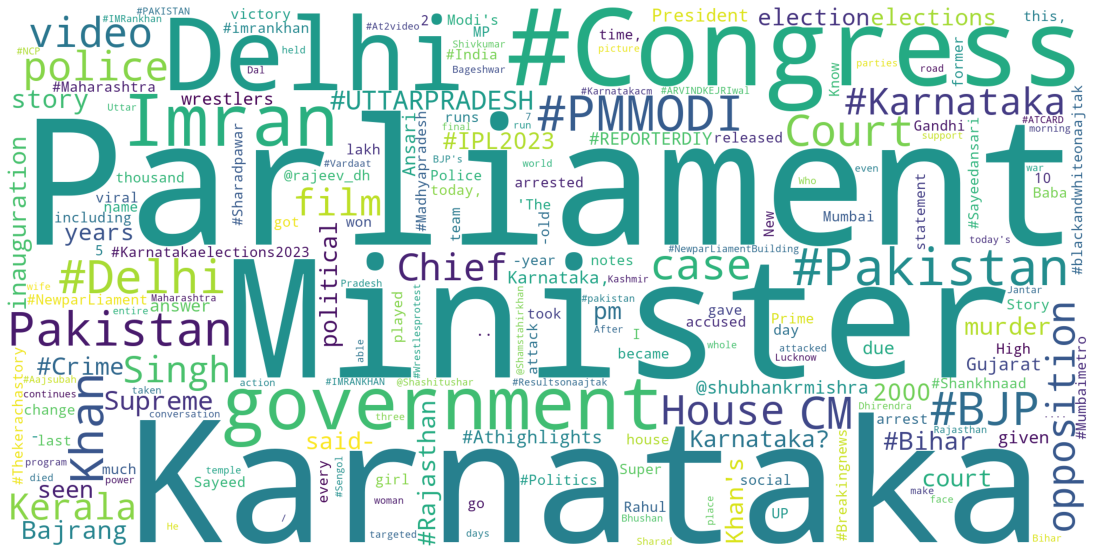

In [49]:
wordcloud = WordCloud(stopwords = stopwords,background_color ='white',height = 1000,
                      width = 2000).generate_from_frequencies(most_occur)
plt.figure(figsize = (15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

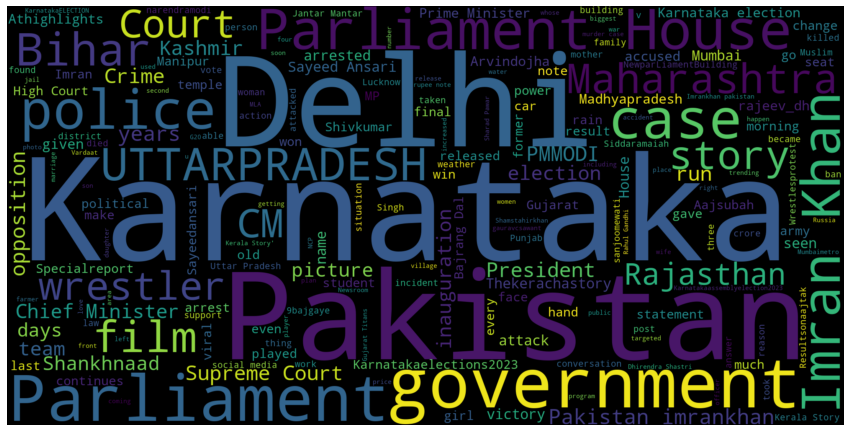

In [58]:
wordcloud = WordCloud(stopwords=stopwords, background_color="black",height = 1000, width = 2000).generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
def tweet_cloud(tweets,stopwordlist):
    text = "".join(text for text in tweets.Text)
    text = re.sub(r'http\S+', '', text, flags=re.MULTILINE)
    stopwords = set(STOPWORDS)
    stopwords.update(stopwordlist)
    wordcloud = WordCloud(stopwords=stopwords, background_color="black",height = 1000, width = 2000).generate(text)
    # Display the generated image:
    # the matplotlib way:
    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

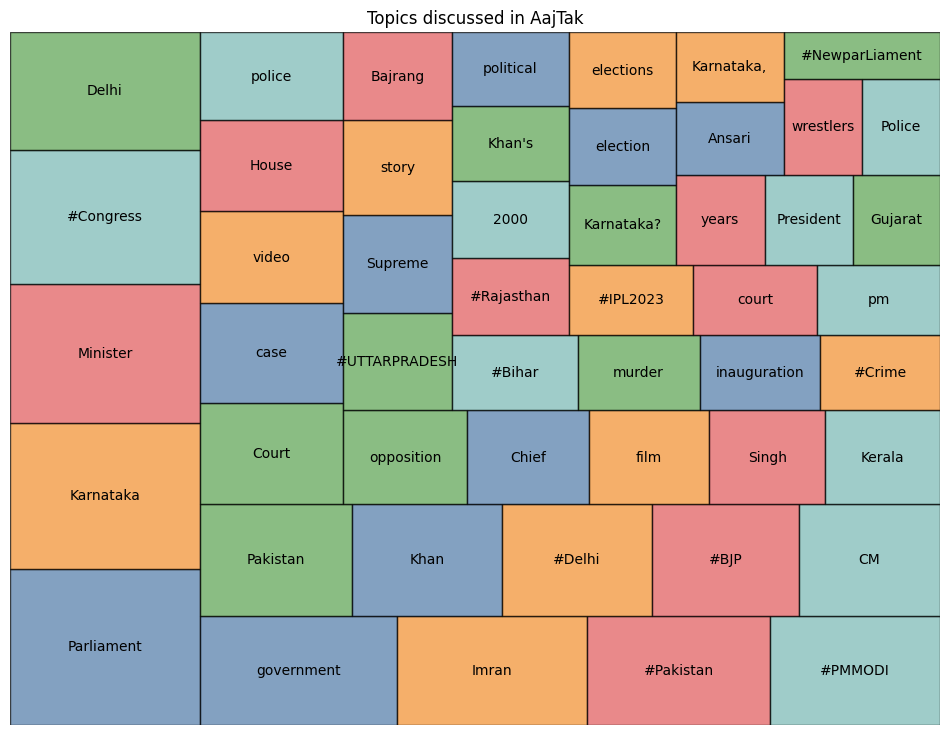

In [62]:
sizes = list(most_occur.values())
labels = list(most_occur.keys()) # Include weight in label

color_palette = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f']

# Create treemap
plt.figure(figsize=(12, 9))
squarify.plot(sizes=sizes, label=labels, alpha=0.7, color=color_palette,edgecolor='black')
plt.axis('off')  # Turn off axis
plt.title('Topics discussed in AajTak')
plt.show()

In [52]:
print(most_occur)

{'Parliament': 375, 'Karnataka': 353, 'Minister': 334, '#Congress': 323, 'Delhi': 284, 'government': 275, 'Imran': 263, '#Pakistan': 255, '#PMMODI': 236, 'Pakistan': 215, 'Khan': 212, '#Delhi': 211, '#BJP': 208, 'CM': 199, 'Court': 185, 'case': 182, 'video': 167, 'House': 166, 'police': 161, 'opposition': 148, 'Chief': 146, 'film': 143, 'Singh': 139, 'Kerala': 137, '#UTTARPRADESH': 135, 'Supreme': 134, 'story': 131, 'Bajrang': 122, '#Bihar': 121, 'murder': 117, 'inauguration': 116, '#Crime': 115, '#Rajasthan': 115, '2000': 114, "Khan's": 113, 'political': 110, '#IPL2023': 110, 'court': 110, 'pm': 109, 'Karnataka?': 108, 'election': 103, 'elections': 103, 'years': 102, 'President': 101, 'Gujarat': 100, 'Ansari': 100, 'Karnataka,': 96, 'wrestlers': 95, '#Karnatakaelections2023': 95, 'Police': 94}
